**1. Chargement des données**

In [162]:
import pandas as pd

# Charger le jeu de données
df = pd.read_csv("dataDiabète.csv")

# Aperçu de la structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2

In [163]:
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63
764,764,2,122,70,27,0,36.8,0.340,27
765,765,5,121,72,23,112,26.2,0.245,30
766,766,1,126,60,0,0,30.1,0.349,47


**2. Analyse exploratoire des données (EDA)**

**2.1 Vérification des dimensions et types**

In [164]:
print("Dimensions :", df.shape)
print("Types de données :", df.dtypes)

Dimensions : (768, 9)
Types de données : Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


**2.2 Valeurs manquantes**

In [165]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


**2.3 Doublons**

In [166]:
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


**2.4 Distribution des variables numériques**

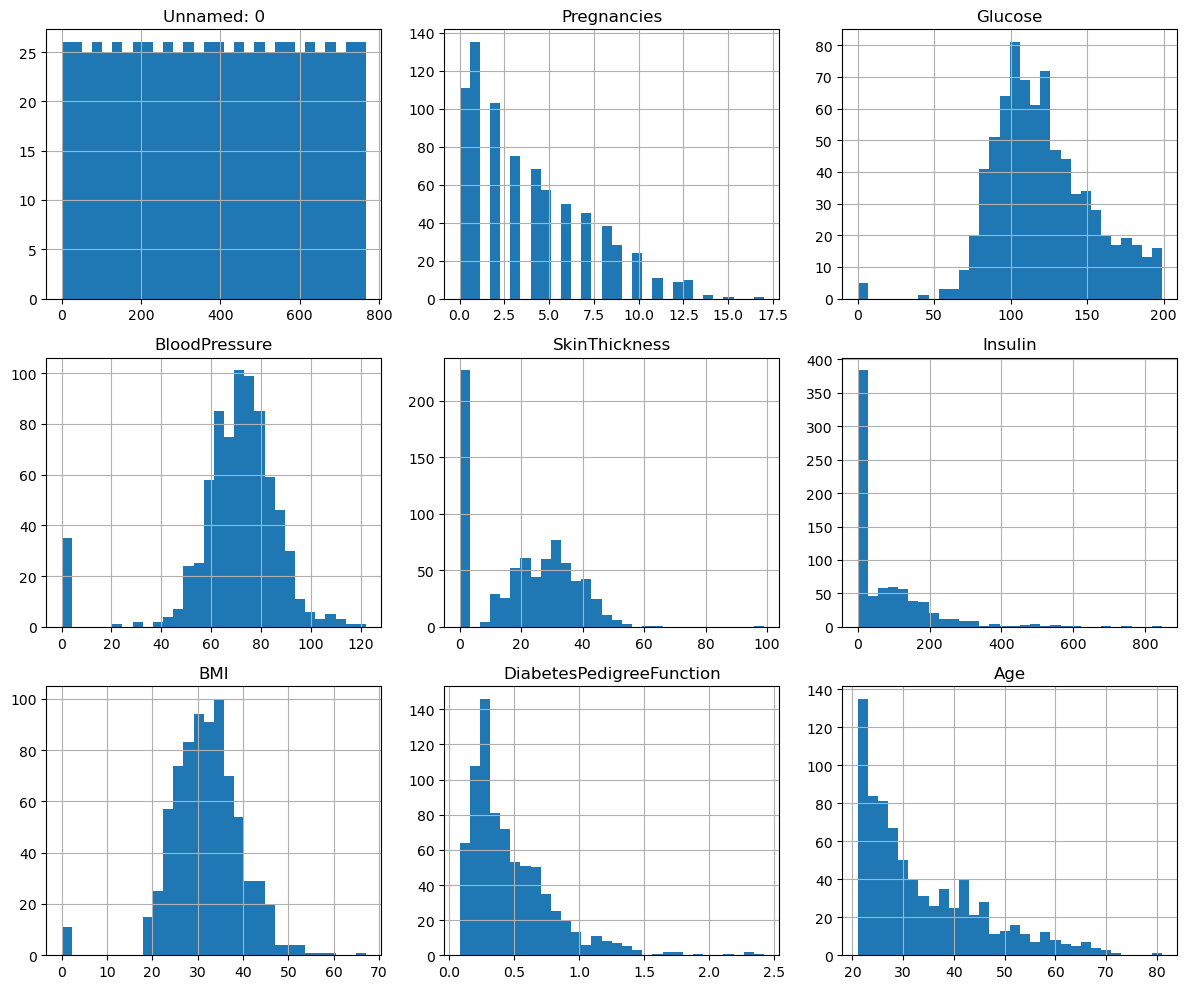

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()


**2.5 Corrélation entre variables**

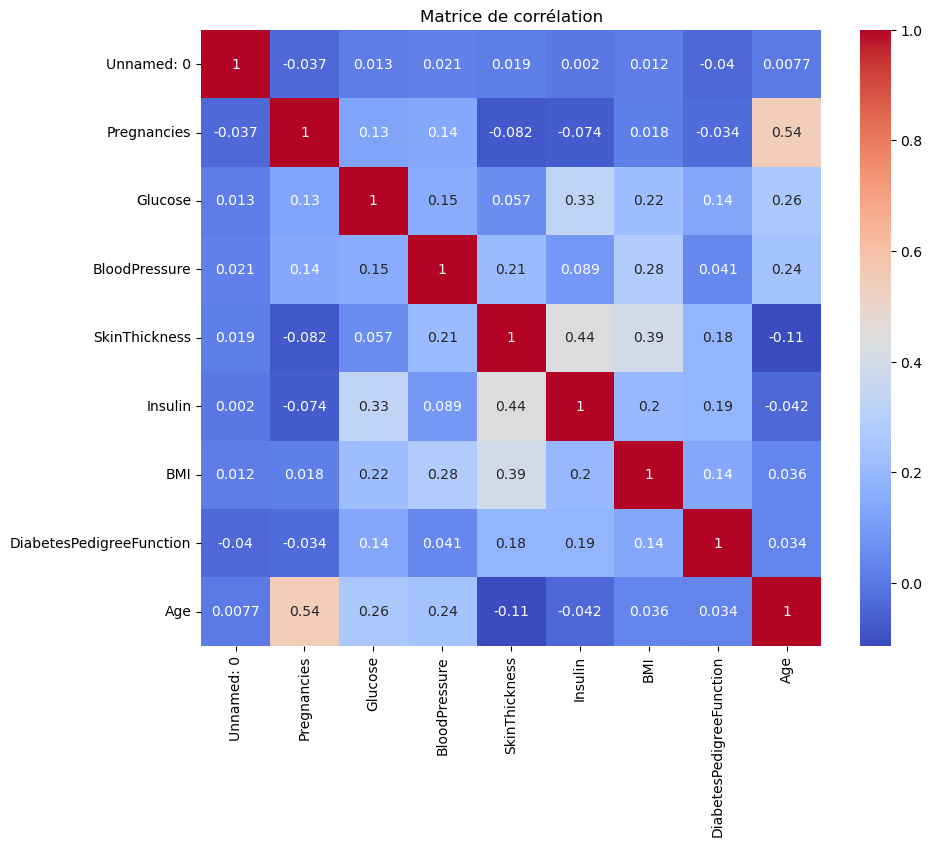

In [168]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


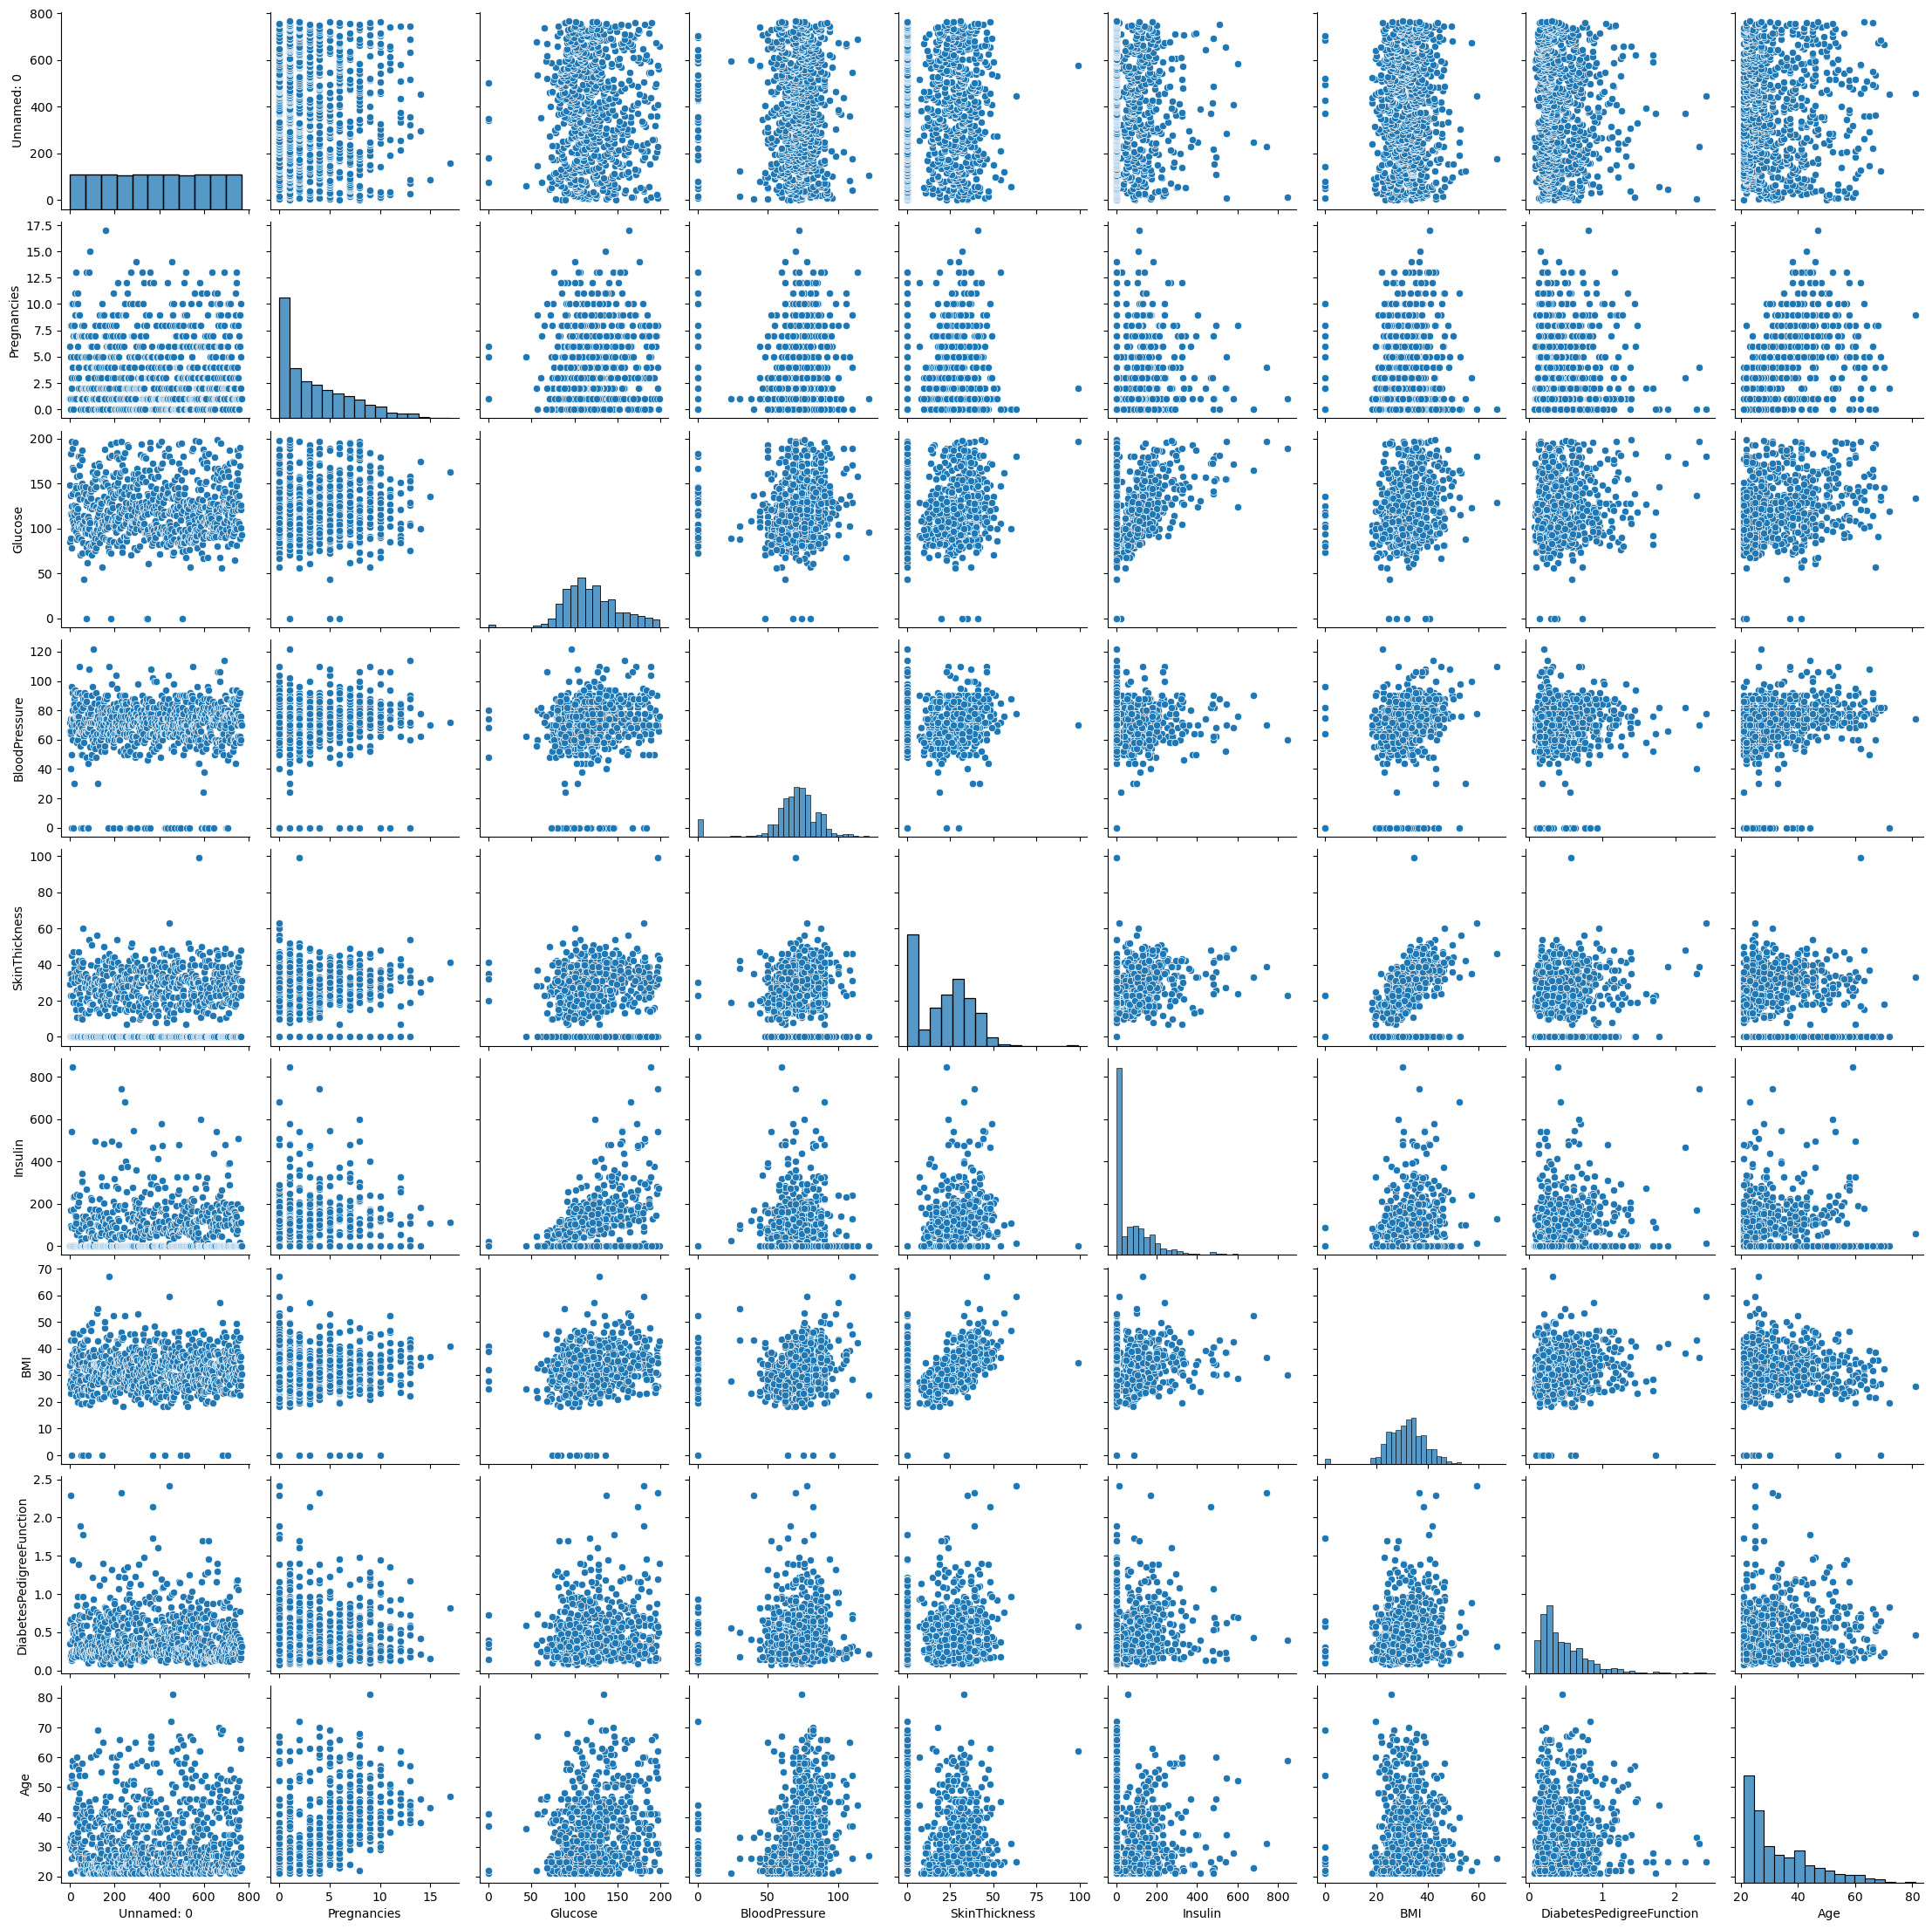

In [169]:
sns.pairplot(df)
plt.show()

**3. Prétraitement des données**

**3.1 Gestion des valeurs manquantes**


il n'existe plus

**3.2 Détection et suppression des valeurs aberrantes**

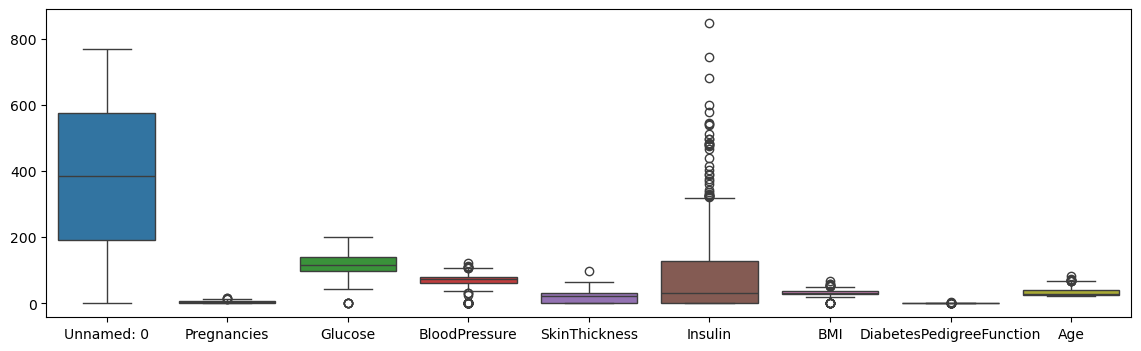

In [170]:
#boîte à moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(df)
plt.show()

In [171]:
#IQR
for colom in df.columns:
    Q1 = df[colom].quantile(0.25)
    Q3 = df[colom].quantile(0.75)
    IQR = Q3 - Q1
    Borne_min = Q1 - 1.5 * IQR
    Borne_max = Q3 + 1.5 * IQR
    df = df[(df[colom] >= Borne_min) & (df[colom] <= Borne_max)]

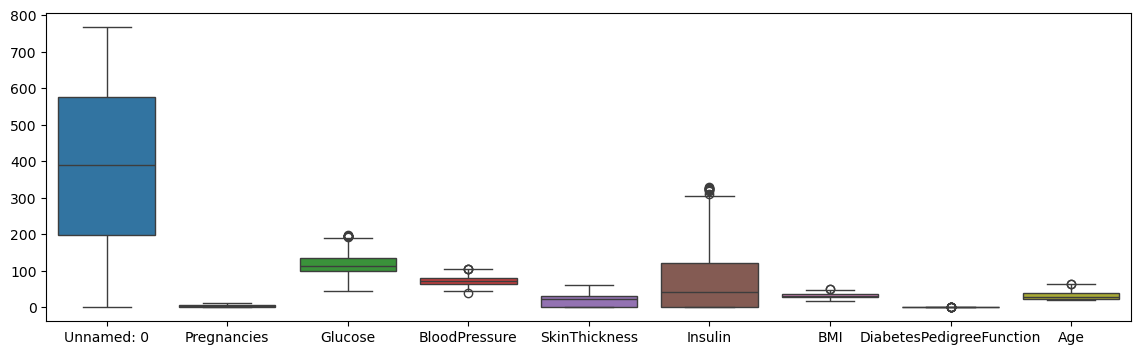

In [172]:
#boîte à moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(df)
plt.show()

etudre la variance

**4. Sélection des variables pour le clustering**

In [173]:
features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_selected = df[features]

In [174]:
df_selected

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,148,33.6,50,0.627
1,85,26.6,31,0.351
2,183,23.3,32,0.672
3,89,28.1,21,0.167
5,116,25.6,30,0.201
...,...,...,...,...
763,101,32.9,63,0.171
764,122,36.8,27,0.340
765,121,26.2,30,0.245
766,126,30.1,47,0.349


**5. Visualisation des relations entre variables**

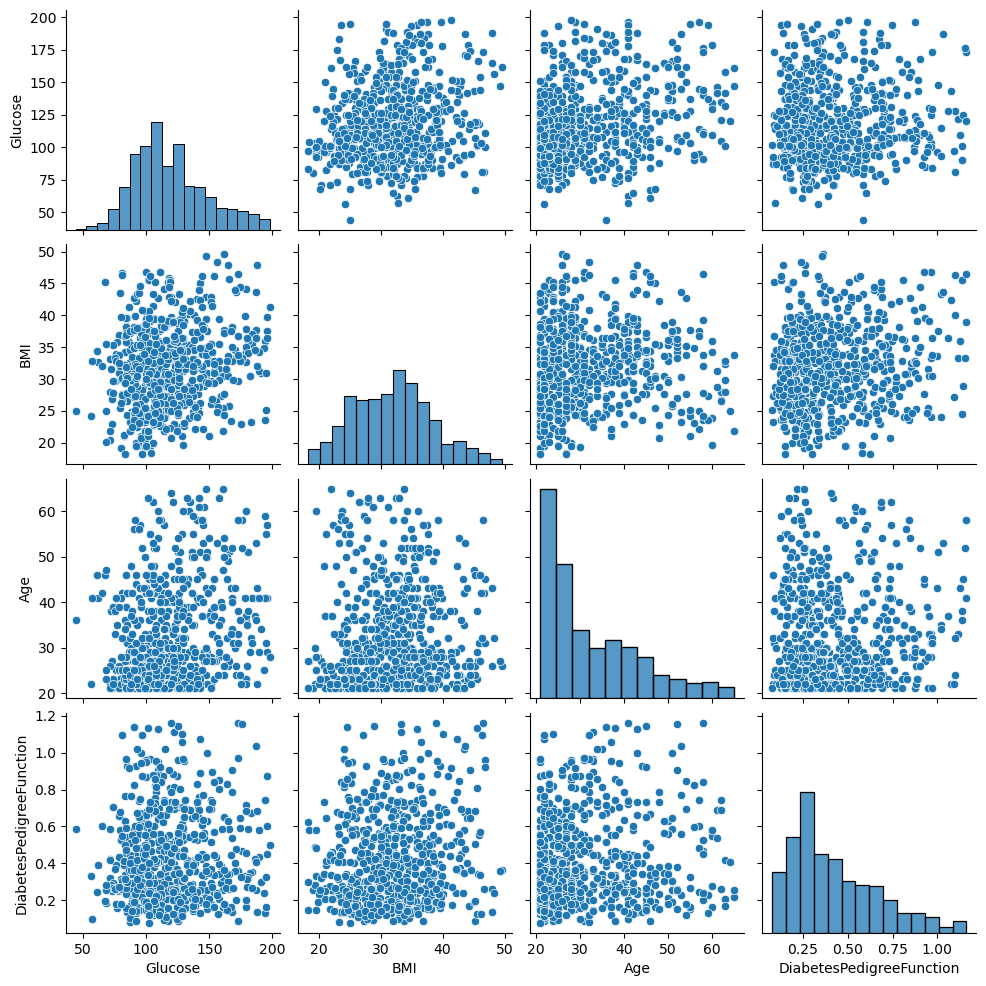

In [175]:
sns.pairplot(df_selected)
plt.show()

**6. Mise à l’échelle des variables**

In [176]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df_selected)
# Facultatif : reconvertir en DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=features)

In [177]:
df_scaled

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,1.005403,0.256438,1.604688,0.819791
1,-1.168963,-0.840893,-0.143041,-0.307223
2,2.213384,-1.358207,-0.051055,1.003543
3,-1.030908,-0.605751,-1.062898,-1.058566
4,-0.099037,-0.997655,-0.235026,-0.919731
...,...,...,...,...
631,-0.616743,0.146705,2.800503,-1.042232
632,0.108045,0.758076,-0.510984,-0.352141
633,0.073532,-0.903598,-0.235026,-0.740062
634,0.246100,-0.292227,1.328731,-0.315390


**6. clustering K-Means**

In [178]:
from sklearn.cluster import KMeans

In [179]:
# import os
# os.environ["OMP_NUM_THREADS"] = "3"  # 1, 2 ou 3
# from sklearn.cluster import KMeans

**6. Détermination de la valeur optimale de k (méthode du coude)**

In [180]:
inertias = []  # liste pour stocker l'inertie pour chaque k

k_range = range(1, 8)  # on teste les valeurs de k de 1 à 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # inertie = somme des distances intra-cluster

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

**6.2 Tracer la courbe du coude**

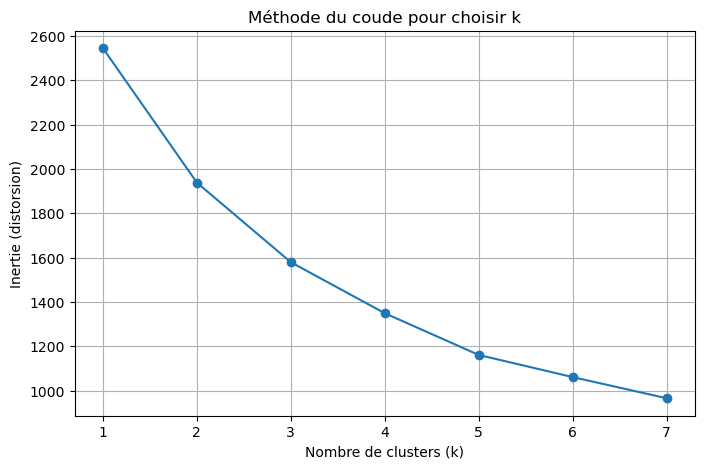

In [181]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude pour choisir k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (distorsion)")
plt.grid(True)
plt.show()

**6.3 Entraînement du modèle K-Means avec le k optimal**

In [202]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**6.4 Ajouter une colonne Cluster au dataset original**

In [203]:
df_scaled['Cluster'] = clusters

**6.5 Visualiser la répartition des observations par cluster**

In [204]:
print(df_scaled['Cluster'].value_counts())

Cluster
1    271
2    229
0    136
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_7208\153506695.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


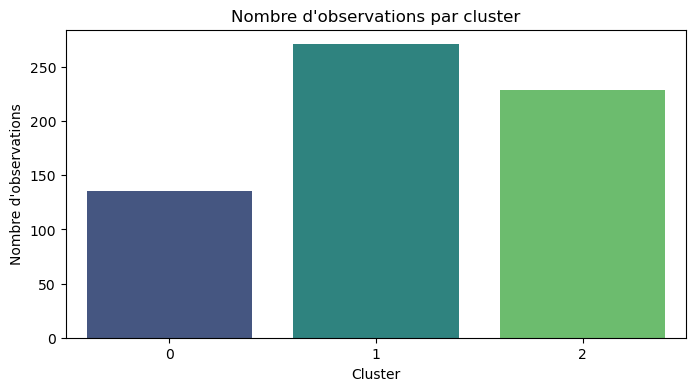

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple avec des données labellisées (kmeans.labels_)
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()

# Visualisation
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Nombre d'observations par cluster")
plt.xlabel("Cluster")
plt.ylabel("Nombre d'observations")
plt.show()

affichage des distrubution des clustre

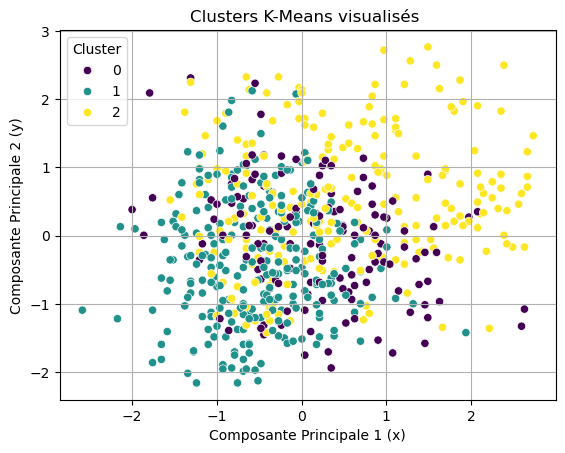

In [206]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_scaled['Cluster'], palette='viridis')
plt.title('Clusters K-Means visualisés ')
plt.xlabel('Composante Principale 1 (x)')
plt.ylabel('Composante Principale 2 (y)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**7 Réduction de dimensionnalité pour visualisation**

**7.1 Appliquer l’ACP (PCA) pour réduire les dimensions à 2 axes.**

In [207]:
print(df_scaled.columns)
df_scaled.head(20)

Index(['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Cluster'], dtype='object')


,Glucose,BMI,Age,DiabetesPedigreeFunction,Cluster
0,1.005403,0.256438,1.604688,0.819791,0
1,-1.168963,-0.840893,-0.143041,-0.307223,1
2,2.213384,-1.358207,-0.051055,1.003543,2
3,-1.030908,-0.605751,-1.062898,-1.058566,1
4,-0.099037,-0.997655,-0.235026,-0.919731,1
5,-1.410559,-0.151142,-0.602969,-0.727812,1
6,-0.306120,0.883485,-0.235026,-0.960565,1
7,1.695677,0.946190,0.132917,0.452286,2
8,1.626650,-0.966303,1.696674,0.656455,0
9,-0.030010,2.168931,-0.143041,0.509454,2


In [214]:
from sklearn.decomposition import PCA

# Appliquer PCA pour réduire les dimensions à 2 axes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Créer un DataFrame pour les composants principaux
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# Ajouter la colonne 'Cluster' au DataFrame PCA pour la visualisation
# Nous devons utiliser l'index de df, qui contient déjà la colonne 'Cluster'
# df_pca['Cluster'] = df['Cluster'].reset_index(drop=True)

print("\nDataFrame PCA avec les deux premières composantes principales et les clusters :")
print(df_pca.head(20))

print(f"\nVariance expliquée par les deux premières composantes principales : {pca.explained_variance_ratio_.sum()*100:.2f}%")


DataFrame PCA avec les deux premières composantes principales et les clusters :
         PC1       PC2
0   0.717147  1.917138
1  -1.244294 -0.557773
2   1.146249  0.298661
3  -1.536125 -0.986299
4  -1.194633  0.006660
5  -1.236114 -0.865740
6  -0.257465  0.040892
7   1.906424  0.490056
8   0.229778  2.235005
9   1.818311 -0.442165
10 -0.856839 -0.081090
11  0.743366 -0.505932
12  1.696634 -0.821818
13 -0.441402  1.418455
14  2.353838  1.527425
15 -0.713514 -0.048297
16  0.055573  2.331449
17 -0.888241  1.346917
18  1.118046  1.099699
19 -1.102439 -1.176341

Variance expliquée par les deux premières composantes principales : 61.46%


In [219]:
df_pca

,PC1,PC2,Cluster_PCA
0,0.717147,1.917138,0
1,-1.244294,-0.557773,0
2,1.146249,0.298661,1
3,-1.536125,-0.986299,0
4,-1.194633,0.006660,0
...,...,...,...
631,-1.040639,2.564036,0
632,0.181940,-0.145884,0
633,-0.962702,0.044559,0
634,-0.591646,1.620939,0


**7.2 Réentraîner le modèle K-Means sur les nouvelles dimensions**

In [215]:
# Réentraîner K-Means sur les données PCA pour la visualisation
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_pca.fit(df_pca[['PC1', 'PC2']])

# Ajouter les nouveaux labels de cluster basés sur PCA au DataFrame PCA
df_pca['Cluster_PCA'] = kmeans_pca.labels_

print(f"\nModèle K-Means réentraîné sur les données PCA avec {2} clusters.")
print("Aperçu du DataFrame PCA avec les clusters recalculés :")
print(df_pca.head(20))


Modèle K-Means réentraîné sur les données PCA avec 2 clusters.
Aperçu du DataFrame PCA avec les clusters recalculés :
         PC1       PC2  Cluster_PCA
0   0.717147  1.917138            0
1  -1.244294 -0.557773            0
2   1.146249  0.298661            1
3  -1.536125 -0.986299            0
4  -1.194633  0.006660            0
5  -1.236114 -0.865740            0
6  -0.257465  0.040892            0
7   1.906424  0.490056            1
8   0.229778  2.235005            0
9   1.818311 -0.442165            1
10 -0.856839 -0.081090            0
11  0.743366 -0.505932            1
12  1.696634 -0.821818            1
13 -0.441402  1.418455            0
14  2.353838  1.527425            1
15 -0.713514 -0.048297            0
16  0.055573  2.331449            0
17 -0.888241  1.346917            0
18  1.118046  1.099699            1
19 -1.102439 -1.176341            0


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**7.3 Visualiser les clusters obtenus et analyser la distribution**

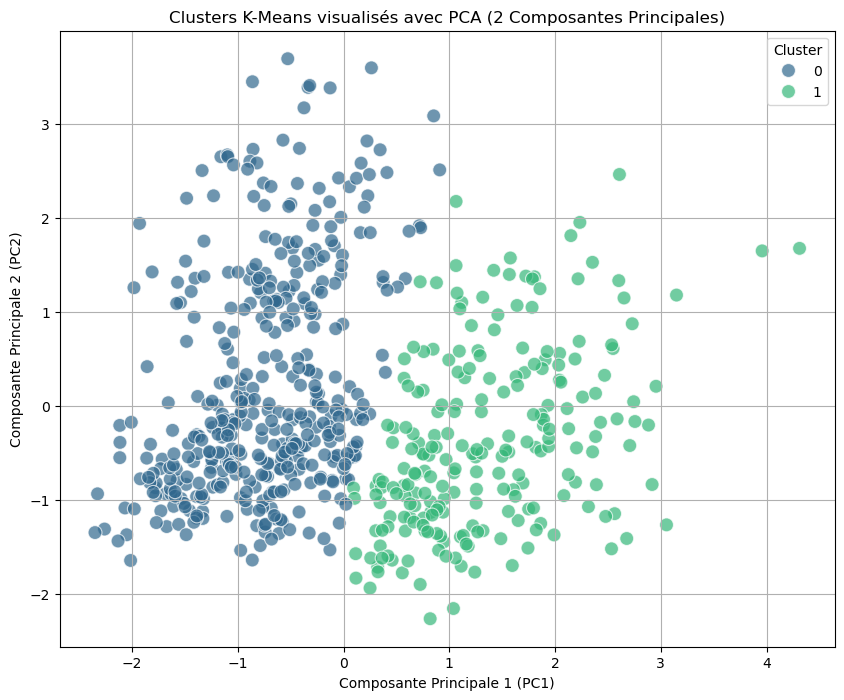


Le graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.


In [235]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_PCA', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters K-Means visualisés avec PCA (2 Composantes Principales)')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("\nLe graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.")

**8 Analyse des clusters**

**8.1 Calculer les moyennes des caractéristiques au sein de chaque cluster**

In [248]:
df_pca

,PC1,PC2,Cluster_PCA
0,0.717147,1.917138,0
1,-1.244294,-0.557773,0
2,1.146249,0.298661,1
3,-1.536125,-0.986299,0
4,-1.194633,0.006660,0
...,...,...,...
631,-1.040639,2.564036,0
632,0.181940,-0.145884,0
633,-0.962702,0.044559,0
634,-0.591646,1.620939,0


In [249]:
# Reset the index of df to align with df_pca
df_reset = df_scaled.reset_index(drop=True)

df_analysis = pd.concat([df_reset[features].loc[df_pca.index], df_pca['Cluster_PCA']], axis=1).copy()

# Le cluster dont les moyennes des variables Glucose (>126), BMI (>30) et Diabetes Pedigree Function (>0,5) dépassent les seuils critiques peut être interprété comme à haut risque de diabète.

# Moyennes par cluster
cluster_means = df_analysis.groupby('Cluster_PCA')[features].mean()
# Ajout d'une colonne de risque
df_analysis['risk_category'] = df_analysis['Cluster_PCA'].apply(lambda x: 1 if cluster_means.loc[x, 'Glucose'] > 126 and cluster_means.loc[x, 'BMI'] > 30 and cluster_means.loc[x, 'DiabetesPedigreeFunction'] > 0.5 else 0)

# Nombre par catégorie
print(df_analysis['risk_category'].value_counts())

print("\nMoyennes des caractéristiques par cluster :")
cluster_means = df_analysis.groupby('Cluster_PCA')[features].mean()
print(cluster_means)

risk_category
0    636
Name: count, dtype: int64

Moyennes des caractéristiques par cluster :
              Glucose       BMI       Age  DiabetesPedigreeFunction
Cluster_PCA                                                        
0           -0.271858 -0.327174  0.077276                 -0.468099
1            0.493194  0.593545 -0.140192                  0.849206


**8.2 Compter le nombre d’observations par groupe**

In [256]:
print("\nNombre d'observations par cluster :")
cluster_counts = df_analysis['Cluster_PCA'].value_counts().sort_index()
print(cluster_counts)


Nombre d'observations par cluster :
Cluster_PCA
0    410
1    226
Name: count, dtype: int64


In [257]:
df_analysis

,Glucose,BMI,Age,DiabetesPedigreeFunction,Cluster_PCA,risk_category
0,1.005403,0.256438,1.604688,0.819791,0,0
1,-1.168963,-0.840893,-0.143041,-0.307223,0,0
2,2.213384,-1.358207,-0.051055,1.003543,1,0
3,-1.030908,-0.605751,-1.062898,-1.058566,0,0
4,-0.099037,-0.997655,-0.235026,-0.919731,0,0
...,...,...,...,...,...,...
631,-0.616743,0.146705,2.800503,-1.042232,0,0
632,0.108045,0.758076,-0.510984,-0.352141,0,0
633,0.073532,-0.903598,-0.235026,-0.740062,0,0
634,0.246100,-0.292227,1.328731,-0.315390,0,0


**8.3 Ajouter une colonne risk_category basée sur le numéro de cluster**

In [ ]:
df_analysis['risk_category'] = df_analysis['Cluster_PCA'].apply(lambda x: 'High Risk' if x == 1 else 'Low Risk')

print("\nDataFrame avec la nouvelle colonne 'risk_category':")
print(df_analysis[['Glucose', 'BMI', 'Age', 'Cluster_PCA', 'risk_category']].head())

print("\nRépartition des patients par catégorie de risque :")
print(df_analysis['risk_category'].value_counts())

KeyError: 'Cluster'

**9 Préparation des données pour la classification**

**9.1 Définir la variable cible y à partir de la colonne risk_category**

In [258]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = df_scaled.copy()
y = df['risk_category']

print(f"Forme de X : {X.shape}")
print(f"Forme de y : {y.shape}")
print("\nPremières lignes de y :")
print(y.head())

KeyError: 'risk_category'

**9.2 Diviser les données en ensemble d’entraînement et de test**

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nForme de X_train : {X_train.shape}")
print(f"Forme de X_test : {X_test.shape}")
print(f"Forme de y_train : {y_train.shape}")
print(f"Forme de y_test : {y_test.shape}")

print("\nRépartition des classes dans l'ensemble d'entraînement avant sur-échantillonnage :")
print(Counter(y_train))


Forme de X_train : (445, 4)
Forme de X_test : (191, 4)
Forme de y_train : (445,)
Forme de y_test : (191,)

Répartition des classes dans l'ensemble d'entraînement avant sur-échantillonnage :
Counter({'High Risk': 268, 'Low Risk': 177})


**9.3 Gérer le déséquilibre des classes avec des techniques de sur-échantillonnage**

In [ ]:
# Gérer le déséquilibre des classes avec RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print("\nRépartition des classes dans l'ensemble d'entraînement après sur-échantillonnage :")
print(Counter(y_train_resampled))


Répartition des classes dans l'ensemble d'entraînement après sur-échantillonnage :
Counter({'High Risk': 268, 'Low Risk': 268})


# Entraînement de plusieurs modèles de classification

Tester les algorithmes suivants :
- Random Forest
- Support Vector Machine (SVM)
- Gradient Boosting Decision Tree
- Régression Logistique

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Initialiser les modèles
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True), # probability=True pour calibration plus tard si nécessaire
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' est bon pour les petits datasets
}

# Dictionnaire pour stocker les résultats
results = {}

print("\n--- Entraînement et évaluation des modèles ---")
for name, model in models.items():
    print(f"\nEntraînement du modèle : {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # Stocker les prédictions pour l'analyse ultérieure
    results[name] = {
        'model': model,
        'predictions': y_pred
    }

    # Évaluation de base
    print(f"Performance de {name} sur l'ensemble de test :")
    print(classification_report(y_test, y_pred))
    print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred)}")

    # Calcul des métriques individuelles
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='High Risk') # Spécifier le label positif
    recall = recall_score(y_test, y_pred, pos_label='High Risk')
    f1 = f1_score(y_test, y_pred, pos_label='High Risk')

    results[name]['metrics'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


--- Entraînement et évaluation des modèles ---

Entraînement du modèle : Random Forest...
Performance de Random Forest sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       0.94      0.97      0.95       115
    Low Risk       0.95      0.91      0.93        76

    accuracy                           0.94       191
   macro avg       0.94      0.94      0.94       191
weighted avg       0.94      0.94      0.94       191

Matrice de confusion :
[[111   4]
 [  7  69]]
Accuracy: 0.9424, Precision: 0.9407, Recall: 0.9652, F1-Score: 0.9528

Entraînement du modèle : SVM...
Performance de SVM sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       0.99      0.98      0.99       115
    Low Risk       0.97      0.99      0.98        76

    accuracy                           0.98       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191

Matrice 

**Validation croisée**

In [ ]:
print("\n--- Validation croisée des modèles ---")
for name, model_data in results.items():
    model = model_data['model']

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted') # Utiliser f1_weighted pour le déséquilibre
    results[name]['cv_scores'] = cv_scores
    print(f"\n{name} - Scores de validation croisée (F1-score pondéré) :")
    print(f"Moyenne : {np.mean(cv_scores):.4f}, Écart-type : {np.std(cv_scores):.4f}")


--- Validation croisée des modèles ---

Random Forest - Scores de validation croisée (F1-score pondéré) :
Moyenne : 0.9544, Écart-type : 0.0209

SVM - Scores de validation croisée (F1-score pondéré) :
Moyenne : 0.9859, Écart-type : 0.0104

Gradient Boosting - Scores de validation croisée (F1-score pondéré) :
Moyenne : 0.9574, Écart-type : 0.0210

Logistic Regression - Scores de validation croisée (F1-score pondéré) :
Moyenne : 0.9969, Écart-type : 0.0063


**Optimisation des hyperparamètres**

In [ ]:
print("\n--- Optimisation des hyperparamètres avec GridSearchCV ---")

# Paramètres pour RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
print("\nRecherche des meilleurs hyperparamètres pour Random Forest...")
grid_search_rf.fit(X_train_resampled, y_train_resampled)
results['Random Forest']['best_model'] = grid_search_rf.best_estimator_
results['Random Forest']['best_params'] = grid_search_rf.best_params_
results['Random Forest']['best_score'] = grid_search_rf.best_score_
print(f"Meilleurs hyperparamètres pour Random Forest : {grid_search_rf.best_params_}")
print(f"Meilleur score F1 (validation) pour Random Forest : {grid_search_rf.best_score_:.4f}")

# Paramètres pour GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
print("\nRecherche des meilleurs hyperparamètres pour Gradient Boosting...")
grid_search_gb.fit(X_train_resampled, y_train_resampled)
results['Gradient Boosting']['best_model'] = grid_search_gb.best_estimator_
results['Gradient Boosting']['best_params'] = grid_search_gb.best_params_
results['Gradient Boosting']['best_score'] = grid_search_gb.best_score_
print(f"Meilleurs hyperparamètres pour Gradient Boosting : {grid_search_gb.best_params_}")
print(f"Meilleur score F1 (validation) pour Gradient Boosting : {grid_search_gb.best_score_:.4f}")

# Re-évaluer les modèles avec les meilleurs hyperparamètres sur l'ensemble de test
print("\n--- Évaluation des modèles avec hyperparamètres optimisés (sur l'ensemble de test) ---")
for name in ['Random Forest', 'Gradient Boosting']: # Seuls ceux que nous avons optimisés
    if 'best_model' in results[name]:
        best_model = results[name]['best_model']
        y_pred_tuned = best_model.predict(X_test)
        print(f"\nPerformance de {name} (optimisé) sur l'ensemble de test :")
        print(classification_report(y_test, y_pred_tuned))
        print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred_tuned)}")
        results[name]['tuned_metrics'] = {
            'Accuracy': accuracy_score(y_test, y_pred_tuned),
            'Precision': precision_score(y_test, y_pred_tuned, pos_label='High Risk'),
            'Recall': recall_score(y_test, y_pred_tuned, pos_label='High Risk'),
            'F1-Score': f1_score(y_test, y_pred_tuned, pos_label='High Risk')
        }
        print(f"Accuracy: {results[name]['tuned_metrics']['Accuracy']:.4f}, Precision: {results[name]['tuned_metrics']['Precision']:.4f}, Recall: {results[name]['tuned_metrics']['Recall']:.4f}, F1-Score: {results[name]['tuned_metrics']['F1-Score']:.4f}")


--- Optimisation des hyperparamètres avec GridSearchCV ---

Recherche des meilleurs hyperparamètres pour Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Meilleurs hyperparamètres pour Random Forest : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score F1 (validation) pour Random Forest : 0.9757

Recherche des meilleurs hyperparamètres pour Gradient Boosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Meilleurs hyperparamètres pour Gradient Boosting : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Meilleur score F1 (validation) pour Gradient Boosting : 0.9590

--- Évaluation des modèles avec hyperparamètres optimisés (sur l'ensemble de test) ---

Performance de Random Forest (optimisé) sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       0.94      0.97      0.95       115
    Low Risk       0.95      0.91      0.93        76

    accuracy             

# Sélection et sauvegarde du meilleur modèle

**Comparer les performances des différents modèles**

In [ ]:
print("\n--- Comparaison finale des modèles ---")
best_f1_score = -1
best_model_name = None
final_models = {}

# Ajouter les modèles optimisés à la comparaison si présents
for name, model_data in results.items():
    if 'best_model' in model_data:
        final_models[name + " (Tuned)"] = model_data['best_model']
        print(f"\nModèle: {name} (Optimisé)")
        for metric, value in model_data['tuned_metrics'].items():
            print(f"- {metric}: {value:.4f}")
        if model_data['tuned_metrics']['F1-Score'] > best_f1_score:
            best_f1_score = model_data['tuned_metrics']['F1-Score']
            best_model_name = name + " (Tuned)"
    else: # Pour les modèles non optimisés par GridSearchCV dans cet exemple (SVM, Logistic Regression)
        final_models[name] = model_data['model']
        print(f"\nModèle: {name}")
        for metric, value in model_data['metrics'].items():
            print(f"- {metric}: {value:.4f}")
        if model_data['metrics']['F1-Score'] > best_f1_score:
            best_f1_score = model_data['metrics']['F1-Score']
            best_model_name = name

print(f"\nLe meilleur modèle est : **{best_model_name}** avec un F1-score de **{best_f1_score:.4f}** sur l'ensemble de test.")


--- Comparaison finale des modèles ---

Modèle: Random Forest (Optimisé)
- Accuracy: 0.9424
- Precision: 0.9407
- Recall: 0.9652
- F1-Score: 0.9528

Modèle: SVM
- Accuracy: 0.9843
- Precision: 0.9912
- Recall: 0.9826
- F1-Score: 0.9869

Modèle: Gradient Boosting (Optimisé)
- Accuracy: 0.9372
- Precision: 0.9328
- Recall: 0.9652
- F1-Score: 0.9487

Modèle: Logistic Regression
- Accuracy: 0.9948
- Precision: 1.0000
- Recall: 0.9913
- F1-Score: 0.9956

Le meilleur modèle est : **Logistic Regression** avec un F1-score de **0.9956** sur l'ensemble de test.


**Choisir le modèle le plus performant**

In [ ]:
# Obtenir le meilleur modèle
if "Tuned" in best_model_name:
    model_key = best_model_name.replace(" (Tuned)", "")
    best_final_model = results[model_key]['best_model']
else:
    best_final_model = results[best_model_name]['model']

print(f"\nModèle final sélectionné : {best_final_model.__class__.__name__}")


Modèle final sélectionné : LogisticRegression


**Sauvegarder le modèle final dans un fichier**

In [ ]:
import joblib

# Nom du fichier pour sauvegarder le modèle
model_filename = 'diabetes_risk_prediction_model.pkl'

# Sauvegarder le modèle
joblib.dump(best_final_model, model_filename)

print(f"\nLe modèle final a été sauvegardé sous : {model_filename}")
print("Vous pouvez maintenant charger ce modèle pour faire des prédictions sur de nouvelles données.")


Le modèle final a été sauvegardé sous : diabetes_risk_prediction_model.pkl
Vous pouvez maintenant charger ce modèle pour faire des prédictions sur de nouvelles données.
